In [6]:
# Step 1
import pandas as pd
df = pd.read_csv('spam.csv',encoding='latin_1')
df

# UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


<AxesSubplot:ylabel='v1'>

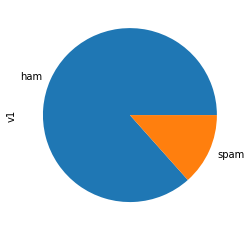

In [10]:
# Imbalanced dataset
df['v1'].value_counts().plot(kind='pie')

In [8]:
4825/5572

0.8659368269921034

In [16]:
# Step 2: Input and Output
x = df['v2'].values
y = df['v1'].values

In [15]:
a = 'I am going to hospital and then Going to home'.lower()
a = a.split()
import numpy as np
np.unique(a)

array(['am', 'and', 'going', 'home', 'hospital', 'i', 'then', 'to'],
      dtype='<U8')

In [17]:
# Step 3: Divide input and output into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [33]:
print(x_test.shape)

(1393, 7441)


In [18]:
# Step 4: Apply vectorization
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
x_train = v.fit_transform(x_train)
x_test = v.transform(x_test)


In [24]:
# Step 5 : Apply logistic regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(x_train,y_train)

LogisticRegression()

In [26]:
y_pred_lr =model_lr.predict(x_test)
y_pred_lr

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [21]:
y_test

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_pred_lr,y_test)

array([[1201,   32],
       [   1,  159]], dtype=int64)

In [28]:
accuracy_score(y_pred_lr,y_test)

0.9763101220387652

In [31]:
from sklearn.naive_bayes import MultinomialNB
model_nb = MultinomialNB()
model_nb.fit(x_train,y_train)
y_pred_nb =model_nb.predict(x_test)
confusion_matrix(y_pred_nb,y_test)

array([[1199,   22],
       [   3,  169]], dtype=int64)

In [32]:
accuracy_score(y_pred_nb,y_test)

0.9820531227566404

In [34]:
1200/1393

0.8614501076812635

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_nb,y_test))

              precision    recall  f1-score   support

         ham       1.00      0.98      0.99      1221
        spam       0.88      0.98      0.93       172

    accuracy                           0.98      1393
   macro avg       0.94      0.98      0.96      1393
weighted avg       0.98      0.98      0.98      1393

